### Подключение библиотеки и скриптов 

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

#### Пути к директория и файлам

In [5]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

### Загрузка данных

 - Id - идентификационный номер квартир
 - DistrictId - идентификационный номер района
 - Rooms - количество комнат
 - Square - площадь
 - LifeSquare - жилая площадь
 - KitchenSquare - площадь кухни
 - Floor - этаж
 - HouseFloor - количество этажей в доме
 - HouseYear - год постройки дома
 - Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
 - Social_1, Social_2, Social_3 - социальные показатели местности
 - Healthcare_1, Healthcare_2 - показатели местности, связанные с охраной здоровья
 - Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
 - Price - цена квартиры

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [8]:
train_df.shape[1]-1 == test_df.shape[1]

True

### Приведение типов

In [9]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
train_df.shape

(10000, 20)

In [11]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [12]:
train_df.shape

(10000, 20)

### Обзор данных

#### Целевая переменная

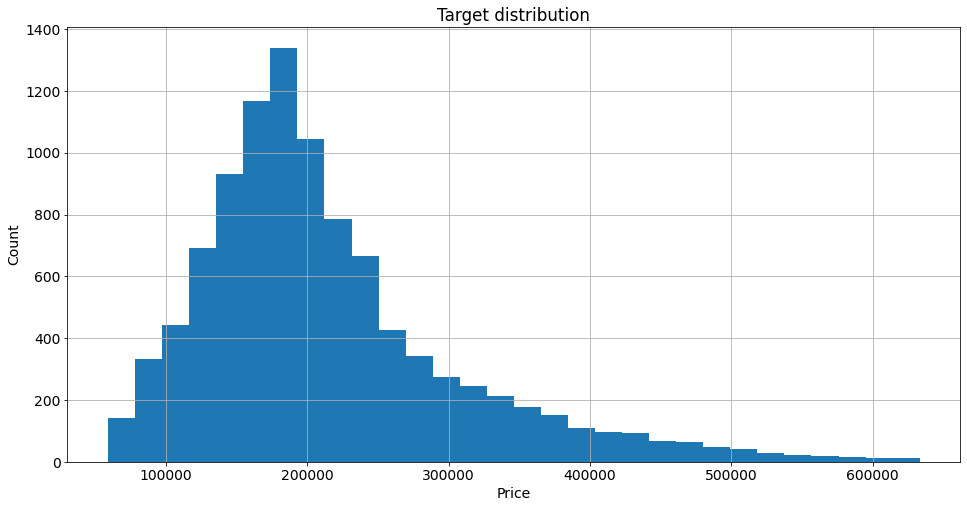

In [13]:
plt.figure(figsize = (16,8))

train_df['Price'].hist(bins = 30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [14]:
target_mean = round(train_df['Price'].mean(), 2)
target_median = round(train_df['Price'].median())
target_mode = round(train_df['Price'].mode()[0])

target_mean, target_median, target_mode

(214138.86, 192270, 59175)

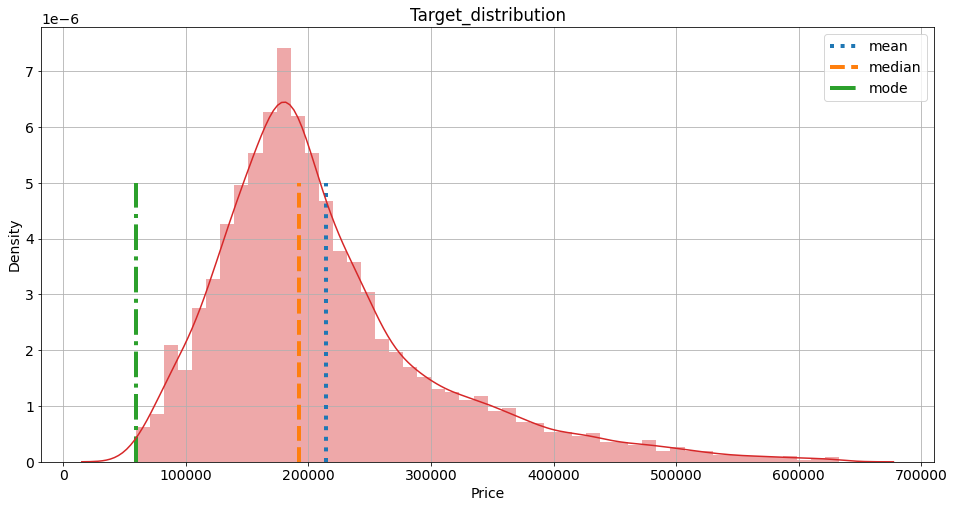

In [15]:
plt.figure(figsize = (16,8))

y = np.linspace(0, 0.000005, 100)

plt.plot([target_mean] * 100, y, label = 'mean', linestyle = ':', linewidth = 4)
plt.plot([target_median] * 100, y, label = 'median', linestyle = '--', linewidth = 4)
plt.plot([target_mode] * 100, y, label = 'mode', linestyle = '-.', linewidth = 4)

sns.distplot(train_df['Price'])
plt.xlabel('Price')
plt.title('Target_distribution')
plt.grid()
plt.legend()
plt.show()

#### Количественные переменные

In [16]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Номинативные переменные

In [17]:
train_df.select_dtypes(include = 'object').columns.to_list()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [18]:
train_df['DistrictId'].value_counts().head()

DistrictId
27    851
1     652
23    565
6     511
9     294
Name: count, dtype: int64

In [19]:
train_df['Ecology_2'].value_counts()

Ecology_2
B    9903
A      97
Name: count, dtype: int64

In [20]:
train_df['Ecology_3'].value_counts()

Ecology_3
B    9725
A     275
Name: count, dtype: int64

In [21]:
train_df['Shops_2'].value_counts()

Shops_2
B    9175
A     825
Name: count, dtype: int64

### Обработка выбросов

#### Rooms

In [22]:
train_df['Rooms'].value_counts()

Rooms
2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: count, dtype: int64

In [23]:
train_df.loc[train_df['Rooms'].isin([0,10,19]), 'Rooms'] = train_df['Rooms'].median()

In [24]:
train_df['Rooms'].value_counts()

Rooms
2.0    3891
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       1
Name: count, dtype: int64

#### Square, LifeSquare, KitchenSquare

In [25]:
train_df['Square'].sort_values(ascending=False)

6977    641.065193
4262    604.705972
4690    409.425181
1982    275.645284
1981    212.932361
           ...    
9294      2.954309
1608      2.596351
4853      2.377248
8283      1.988943
6392      1.136859
Name: Square, Length: 10000, dtype: float64

In [26]:
train_df['Square'].value_counts()

Square
47.981561     1
56.484305     1
36.417766     1
37.253108     1
58.992068     1
             ..
76.729917     1
56.984833     1
104.745206    1
55.278957     1
38.666645     1
Name: count, Length: 10000, dtype: int64

In [27]:
train_df['LifeSquare'].value_counts()

LifeSquare
29.442751    1
23.141324    1
61.794489    1
31.274472    1
42.007038    1
            ..
61.334170    1
39.856885    1
19.131393    1
31.807667    1
21.157874    1
Name: count, Length: 7887, dtype: int64

In [28]:
train_df['LifeSquare'].sort_values(ascending=False).head()

4328    7480.592129
6977     638.163193
8437     461.463614
4690     410.639749
590      263.542020
Name: LifeSquare, dtype: float64

In [29]:
train_df = train_df[train_df['Square'].isnull() | 
                    (train_df['Square'] < train_df['Square'].quantile(.975)) |
                    (train_df['Square'] > train_df['Square'].quantile(.025))]

train_df = train_df[train_df['LifeSquare'].isnull() | 
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.975)) |
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))]

In [30]:
train_df.shape

(10000, 20)

In [31]:
train_df['KitchenSquare'].value_counts()

KitchenSquare
1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
32.0         2
41.0         2
51.0         2
30.0         2
112.0        2
37.0         2
43.0         2
25.0         2
58.0         2
84.0         1
75.0         1
21.0         1
54.0         1
62.0         1
40.0         1
29.0         1
1970.0       1
27.0         1
39.0         1
35.0         1
23.0         1
73.0         1
31.0         1
60.0         1
63.0         1
42.0         1
36.0         1
96.0         1
26.0         1
53.0         1
78.0         1
66.0         1
2014.0       1
48.0         1
72.0         1
123.0        1
Name: count, dtype: int64

In [32]:
train_df = train_df[train_df['KitchenSquare'].isnull() |
                  (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

In [33]:
# train_df[train_df['KitchenSquare'].isnull() | \
#          (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))].value_counts()

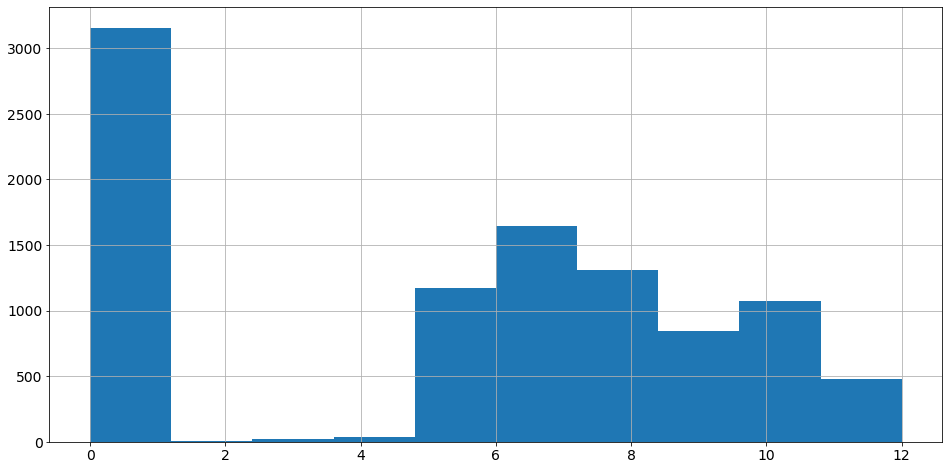

In [34]:
plt.figure(figsize = (16,8))

train_df['KitchenSquare'].hist(bins = 10)
plt.show()

In [35]:
train_df.shape

(9744, 20)

In [36]:
train_df['KitchenSquare'].value_counts()

KitchenSquare
1.0     2460
8.0     1306
5.0     1169
10.0    1075
6.0     1038
9.0      843
0.0      697
7.0      609
12.0     249
11.0     233
4.0       39
3.0       22
2.0        4
Name: count, dtype: int64

In [37]:
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [38]:
# train_df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = 5

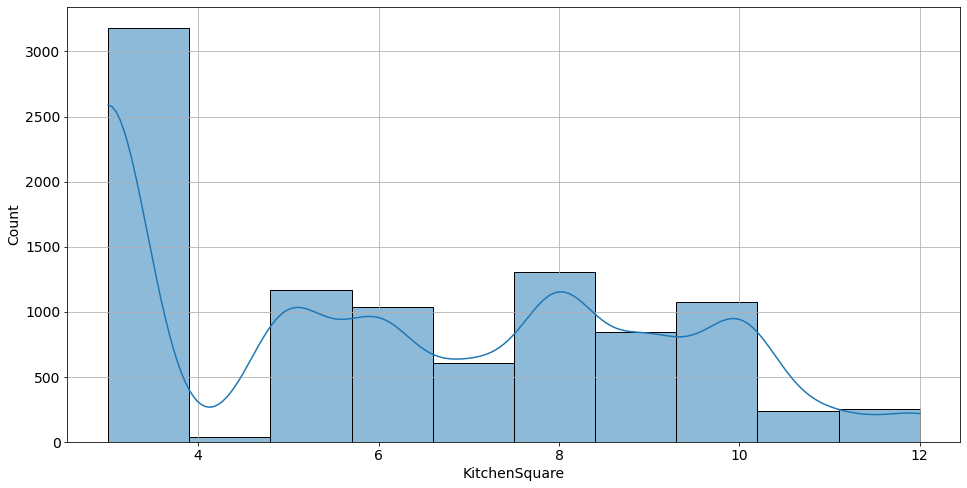

In [39]:
plt.figure(figsize = (16,8))

sns.histplot(train_df['KitchenSquare'], kde = True, bins = 10)
plt.grid()

plt.show()

In [40]:
train_df.shape

(9744, 20)

#### HouseFloor, Floor

In [41]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,
        38.,  39.,  40.,  44.,  45.,  48.,  99., 117.])

In [42]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [43]:
train_df.loc[train_df['HouseFloor'] == 0 , 'HouseFloor'] = train_df['HouseFloor'].median()

In [44]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1,x))

In [45]:
train_df.shape

(9744, 20)

#### HouseYear

In [46]:
train_df['HouseYear'].sort_values(ascending = False)

1497    20052011
4189        4968
7076        2020
2493        2020
4053        2020
          ...   
8505        1918
8144        1917
1380        1917
5053        1917
910         1914
Name: HouseYear, Length: 9744, dtype: int64

In [47]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

### Обработка пропусков

In [48]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2102
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4673
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [49]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,3.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,3.0
8,64.511437,NaN,3.0
9,46.461409,18.915552,8.0


#### LifeSquare

In [50]:
train_df['LifeSquare'].median()

32.52527901166731

In [51]:
square_med_diff = (train_df.loc[train_df['LifeSquare'].notnull(), 'Square'] - \
                   train_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] - \
                   train_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

In [52]:
square_med_diff

11.295380291262163

In [53]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = \
train_df.loc[train_df['LifeSquare'].isnull(), 'Square'] - \
train_df.loc[train_df['LifeSquare'].isnull(), 'KitchenSquare'] - \
square_med_diff

In [54]:
train_df['LifeSquare'].median()

33.60944665146678

#### Healthcare_1

In [55]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

### Построение новых признаков

#### Dummies

In [56]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A': 0, 'B': 1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A': 0, 'B': 1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A': 0, 'B': 1})

#### DistrictSize, IsDistrictLarge

In [57]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'count': 'DistrictSize'})

In [58]:
district_size.head()

,DistrictId,DistrictSize
0,27,810
1,1,646
2,23,546
3,6,503
4,9,292


In [59]:
train_df = train_df.merge(district_size, on = 'DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,900.0,0,11,B,184966.930730,1,1,1,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,86
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,1,1,1,170
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,174
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,97


In [60]:
(train_df['DistrictSize'] > 100).value_counts()

DistrictSize
True     4943
False    4801
Name: count, dtype: int64

In [61]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

#### MedPriceByDistrict

In [62]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'median'})\
                        .rename(columns={'Price': 'MedPriceByDistrict'})

In [63]:
med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142486.170594
1,0,2.0,176210.812334
2,0,3.0,308098.189977
3,1,1.0,147110.201250
4,1,2.0,202626.530012


In [64]:
train_df = train_df.merge(med_price_by_district, on = ['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,1,1,1,22,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,1,1,1,86,0,297041.145784
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,1,1,1,170,1,261705.465881
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,1,1,1,174,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,1,1,1,97,0,158539.052715


#### MedPriceBySquare

In [65]:
med_price_by_square = train_df.groupby(['Square'], as_index=False).agg({'Price': 'median'})\
                        .rename(columns={'Price': 'MedPriceBySquare'})

In [66]:
med_price_by_square.head()

,Square,MedPriceBySquare
0,1.136859,181434.825589
1,1.988943,458378.777006
2,2.377248,126596.941798
3,2.596351,137597.601458
4,2.954309,438005.182323


In [67]:
# train_df = train_df.merge(med_price_by_square, on='Square', how='left')
# train_df.head()

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9744 entries, 0 to 9743
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  9744 non-null   object 
 1   DistrictId          9744 non-null   object 
 2   Rooms               9744 non-null   float64
 3   Square              9744 non-null   float64
 4   LifeSquare          9744 non-null   float64
 5   KitchenSquare       9744 non-null   float64
 6   Floor               9744 non-null   int64  
 7   HouseFloor          9744 non-null   float64
 8   HouseYear           9744 non-null   int64  
 9   Ecology_1           9744 non-null   float64
 10  Ecology_2           9744 non-null   object 
 11  Ecology_3           9744 non-null   object 
 12  Social_1            9744 non-null   int64  
 13  Social_2            9744 non-null   int64  
 14  Social_3            9744 non-null   int64  
 15  Healthcare_1        9744 non-null   float64
 16  Helthc

### Отбор признаков

In [69]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [70]:
feature_names = ['Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear',
                'Ecology_1', 'Ecology_2_bin','Ecology_3_bin','Social_1','Social_2','Social_3',
                 'Healthcare_1','Helthcare_2','Shops_1','Shops_2_bin']

new_feature_names = ['DistrictSize','IsDistrictLarge','MedPriceByDistrict']

target_name = 'Price'

### Разбиение на train и test

In [71]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state = 21)

### Потсроение модели

#### Обучение и оценка модели

In [73]:
rf_model = RandomForestRegressor(random_state = 21)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

#### Отложенная выборка

In [74]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)



Train R2:	0.966
Test R2:	0.74


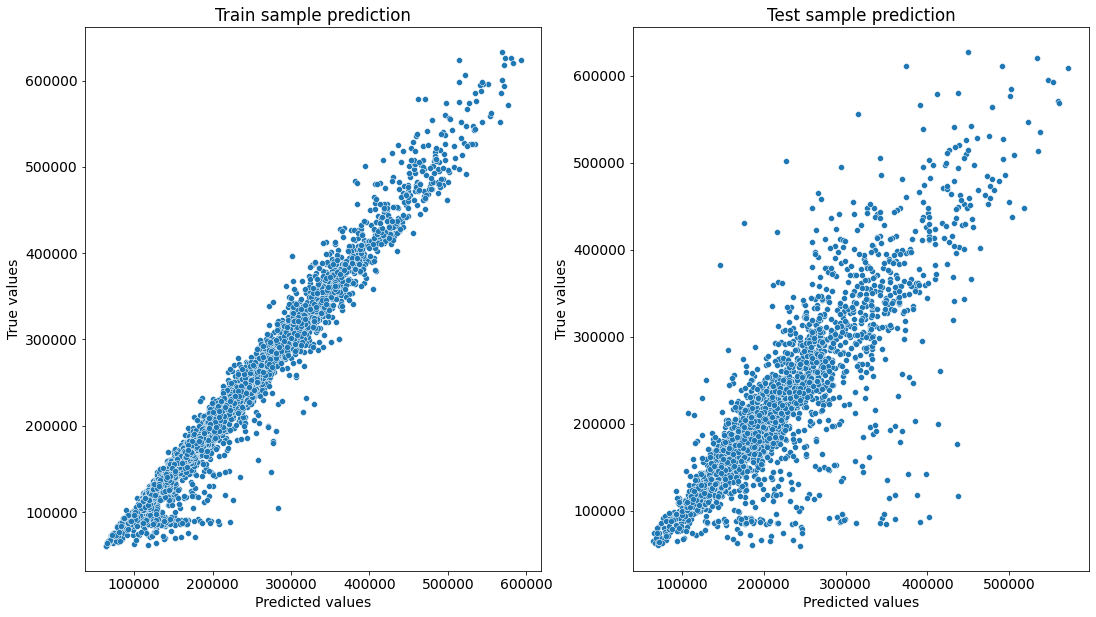

In [75]:
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [76]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits = 3, shuffle = True, random_state = 21))
cv_score

array([0.73975906, 0.75371237, 0.75985099])

In [77]:
cv_score.mean()

0.7511074735604373

#### Важность признаков

In [78]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),
                                  columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending = False)

,feature_name,importance
19,MedPriceByDistrict,0.624341
1,Square,0.122814
6,HouseYear,0.031251
2,LifeSquare,0.030505
17,DistrictSize,0.025887
3,KitchenSquare,0.022930
5,HouseFloor,0.022449
12,Social_3,0.021610
4,Floor,0.019877
7,Ecology_1,0.014314


## Построение прогнозов для тестового датасета

In [79]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [80]:
test_df.shape

(5000, 19)

### Обработка и построение признаков на тестовом датасете

### Приведение типов

In [81]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

### Обработка пропусков

In [82]:
len(test_df) - test_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

#### LifeSquare

In [83]:
test_df['LifeSquare'].median()

32.92508663208161

In [84]:
square_med_diff_test = (test_df.loc[train_df['LifeSquare'].notnull(), 'Square'] - \
                   test_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] - \
                   test_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

In [85]:
square_med_diff_test

11.387384397363597

In [86]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = \
test_df.loc[test_df['LifeSquare'].isnull(), 'Square'] - \
test_df.loc[test_df['LifeSquare'].isnull(), 'KitchenSquare'] - \
square_med_diff_test

In [87]:
test_df['LifeSquare'].median()

34.3190758440274

#### Healthcare_1

In [88]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [89]:
len(test_df) - test_df.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

### Обработка выбросов

#### Rooms

In [90]:
test_df['Rooms'].value_counts()

Rooms
2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: count, dtype: int64

In [91]:
test_df.loc[test_df['Rooms'].isin([0,17]), 'Rooms'] = test_df['Rooms'].median()

### Dummies

In [92]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A': 0, 'B': 1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A': 0, 'B': 1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A': 0, 'B': 1})

#### DistrictSize, IsDistrictLarge

In [93]:
district_size_test = test_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'count': 'DistrictSize'})

In [94]:
district_size_test.head()

,DistrictId,DistrictSize
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132


In [95]:
test_df = test_df.merge(district_size_test, on = 'DistrictId', how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,2748,1,900.0,0,0,B,1,1,1,91
1,15856,74,2.0,69.263183,56.875799,1.0,6,1.0,1977,0.075779,...,1437,3,900.0,0,2,B,1,1,1,61
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,7538,87,4702.0,5,5,B,1,1,1,2
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,4583,3,900.0,3,3,B,1,1,1,49
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,629,1,900.0,0,0,A,1,1,0,391


In [96]:
(test_df['DistrictSize'] > 100).value_counts()

DistrictSize
False    3375
True     1625
Name: count, dtype: int64

In [97]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)

#### MedPriceByDistrict

In [98]:
test_df = test_df.merge(med_price_by_district, on = ['DistrictId', 'Rooms'], how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,900.0,0,0,B,1,1,1,91,0,166809.665642
1,15856,74,2.0,69.263183,56.875799,1.0,6,1.0,1977,0.075779,...,900.0,0,2,B,1,1,1,61,0,242515.793425
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,4702.0,5,5,B,1,1,1,2,0,NaN
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,900.0,3,3,B,1,1,1,49,0,222227.584211
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,900.0,0,0,A,1,1,0,391,1,117711.346469


In [99]:
len(test_df) - test_df.count()

Id                     0
DistrictId             0
Rooms                  0
Square                 0
LifeSquare             0
KitchenSquare          0
Floor                  0
HouseFloor             0
HouseYear              0
Ecology_1              0
Ecology_2              0
Ecology_3              0
Social_1               0
Social_2               0
Social_3               0
Healthcare_1           0
Helthcare_2            0
Shops_1                0
Shops_2                0
Ecology_2_bin          0
Ecology_3_bin          0
Shops_2_bin            0
DistrictSize           0
IsDistrictLarge        0
MedPriceByDistrict    71
dtype: int64

#### MedianPriceByDistrict fillna

In [100]:
rooms_test = test_df.loc[test_df['MedPriceByDistrict'].isnull(), ['Rooms','MedPriceByDistrict']]['Rooms'].value_counts() \
        .reset_index()['Rooms'].to_list()

for i in rooms_test:

    test_df.loc[test_df['Rooms'] == i, 'MedPriceByDistrict'] = \
    test_df.loc[test_df['Rooms'] == i, 'MedPriceByDistrict'].fillna(test_df.loc[test_df['Rooms'] == i, \
                                       'MedPriceByDistrict'].median())
    
    print(i)
    

4.0
1.0
3.0
2.0
5.0
6.0


In [101]:
len(test_df) - test_df.count()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Ecology_2_bin         0
Ecology_3_bin         0
Shops_2_bin           0
DistrictSize          0
IsDistrictLarge       0
MedPriceByDistrict    2
dtype: int64

In [102]:
test_df[test_df['MedPriceByDistrict'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
2071,10793,23,6.0,110.750226,99.362841,0.0,2,2.0,2015,0.014073,...,900.0,0,0,B,1,1,1,264,1,NaN
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,...,900.0,1,4,B,1,1,1,391,1,NaN


In [103]:
test_df.loc[test_df['Rooms'] == 6, 'MedPriceByDistrict'] = \
test_df.loc[test_df['Rooms'] == 6, 'MedPriceByDistrict'].fillna(test_df['MedPriceByDistrict'].median())


In [104]:
test_df[test_df['Rooms'] == 6]['MedPriceByDistrict']

2071    195474.299127
3217    195474.299127
Name: MedPriceByDistrict, dtype: float64

In [105]:
len(test_df) - test_df.count()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Ecology_2_bin         0
Ecology_3_bin         0
Shops_2_bin           0
DistrictSize          0
IsDistrictLarge       0
MedPriceByDistrict    0
dtype: int64

In [106]:
test_df.dtypes

Id                     object
DistrictId             object
Rooms                 float64
Square                float64
LifeSquare            float64
KitchenSquare         float64
Floor                   int64
HouseFloor            float64
HouseYear               int64
Ecology_1             float64
Ecology_2              object
Ecology_3              object
Social_1                int64
Social_2                int64
Social_3                int64
Healthcare_1          float64
Helthcare_2             int64
Shops_1                 int64
Shops_2                object
Ecology_2_bin           int64
Ecology_3_bin           int64
Shops_2_bin             int64
DistrictSize            int64
IsDistrictLarge         int64
MedPriceByDistrict    float64
dtype: object

### Отбор признаков

In [107]:
test_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [108]:
test_df = test_df[feature_names + new_feature_names]

### Прогнозирование на тестовом датасете

In [109]:
test_df.head(15)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,91,0,166809.665642
1,2.0,69.263183,56.875799,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,61,0,242515.793425
2,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,2,0,157482.352303
3,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,49,0,222227.584211
4,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,391,1,117711.346469
5,1.0,40.675627,28.288242,1.0,21,21.0,1977,0.049637,1,1,34,7759,0,229.0,1,3,1,91,0,195474.299127
6,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,264,1,143114.254284
7,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,1,1,46,7960,6,350.0,3,11,1,21,0,233599.115975
8,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,1,1,53,14892,4,900.0,1,4,1,42,0,302606.920832
9,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,1,1,5,1564,0,540.0,0,0,1,257,1,215577.663951


In [110]:
test_preds = rf_model.predict(test_df)

In [111]:
test_df['Predicted_Price'] = test_preds

In [112]:
test_df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict,Predicted_Price
0,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,...,2748,1,900.0,0,0,1,91,0,166809.665642,167360.992171
1,2.0,69.263183,56.875799,1.0,6,1.0,1977,0.075779,1,1,...,1437,3,900.0,0,2,1,61,0,242515.793425,256168.535584
2,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,...,7538,87,4702.0,5,5,1,2,0,157482.352303,141052.464703
3,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,...,4583,3,900.0,3,3,1,49,0,222227.584211,309861.794667
4,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,...,629,1,900.0,0,0,0,391,1,117711.346469,147250.516616


In [ ]:
#### sfsdfsdfsd